In [1]:
from random import randrange
import os
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
import Configurations
from utils import plotUtils
from random import randrange
from tensorflow import keras
from utils import modelUtils
from keras.utils.vis_utils import plot_model

Configuration report:
Number of Subgroups is: 7
The Trend Simulation Formel is: x*1.3+10


In [2]:
# Prepare Training data
x, y, test_x, test_y = modelUtils.getTrainAndTestData()
# cut data for prediction
DataPoinstsNumber = 4
#x_classicfication_test = test_x
x = x[:,0:DataPoinstsNumber]
test_x = test_x[:,0:DataPoinstsNumber]
neuralInputsNumber = DataPoinstsNumber
targetVarNumber = Configurations.numberOftargetVariables

Epoch 1/30
313/313 [==============================] - 1s 1ms/step - loss: 0.3006 - accuracy: 0.6392 - val_loss: 0.2339 - val_accuracy: 0.7426
Epoch 2/30
313/313 [==============================] - 0s 857us/step - loss: 0.2258 - accuracy: 0.7462 - val_loss: 0.2150 - val_accuracy: 0.7682
Epoch 3/30
313/313 [==============================] - 0s 870us/step - loss: 0.2110 - accuracy: 0.7586 - val_loss: 0.2072 - val_accuracy: 0.7740
Epoch 4/30
313/313 [==============================] - 0s 841us/step - loss: 0.2079 - accuracy: 0.7702 - val_loss: 0.2076 - val_accuracy: 0.7736
Epoch 5/30
313/313 [==============================] - 0s 892us/step - loss: 0.2031 - accuracy: 0.7740 - val_loss: 0.2051 - val_accuracy: 0.7792
Epoch 6/30
313/313 [==============================] - 0s 917us/step - loss: 0.2002 - accuracy: 0.7778 - val_loss: 0.2042 - val_accuracy: 0.7790
Epoch 7/30
313/313 [==============================] - 0s 849us/step - loss: 0.1998 - accuracy: 0.7796 - val_loss: 0.2032 - val_accuracy: 0

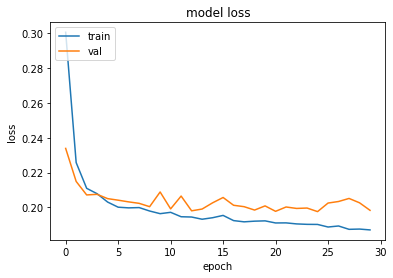

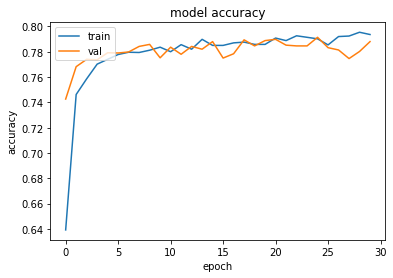

In [3]:
# Train Model
#[65, 72, 73, 107]
model = keras.Sequential([
    keras.layers.Input( shape=(neuralInputsNumber),name="Eingabeschicht"),
    keras.layers.Dense(65, activation='relu',name="Verborgene_schicht_1"),
    keras.layers.Dense(72,  activation='relu',name="Verborgene_schicht_2"),
    keras.layers.Dense(73,  activation='relu',name="Verborgene_schicht_3"),
    keras.layers.Dense(107,  activation='relu',name="Verborgene_schicht_4"),
    keras.layers.Dense(targetVarNumber, activation='sigmoid',name="Ausgabeschicht")])
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x, y, batch_size=16 ,epochs=30,validation_data=(test_x, test_y))

print("EVALUATION")
model.evaluate(test_x, test_y)
plotUtils.plotLoss(history)
plotUtils.plotAccuracy(history)
# y_pred=model.predict(test_x)
# kbacc = keras.metrics.BinaryAccuracy()
# _ = kbacc.update_state(test_y, y_pred)
# print(f'Keras BinaryAccuracy acc: {kbacc.result().numpy()*100:.3}')

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1000
           1       0.82      0.83      0.83      1000
           2       0.72      0.85      0.78      1000
           3       0.73      0.82      0.77      1000
           4       0.87      0.66      0.75      1000

    accuracy                           0.79      5000
   macro avg       0.80      0.79      0.79      5000
weighted avg       0.80      0.79      0.79      5000

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Verborgene_schicht_1 (Dense  (None, 65)               325       
 )                                                               
                                                                 
 Verborgene_schicht_2 (Dense  (None, 72)               4752      
 )                                                               
                             

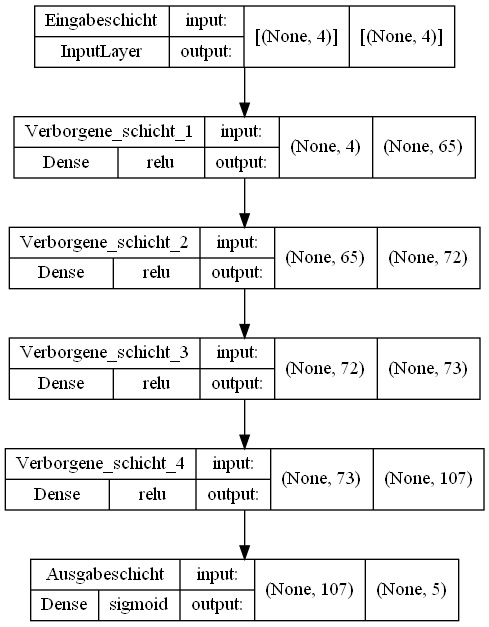

In [4]:

predictions = model.predict(test_x)
accurancy,confusionMatrix,report = modelUtils.getMetric(predictions,test_y)
print(report)
print(model.summary())
plot_model(model, to_file='model_plot_pred.png', show_shapes=True, show_layer_names=True,show_layer_activations=True)

In [5]:
#Save Model
#model.save('../model/prediction_all_model')

In [6]:
wrongClassificationsCharts,shouldClassifications= modelUtils.getFalseClassifications(model,test_x,test_y)

False Predictions Number:  1060  from:  5000


In [7]:
table,table_with_count_of_duplicated,grouped_table,summarized_tabel = modelUtils.getFalseClassificationsReport(model,wrongClassificationsCharts,shouldClassifications)


1060 1060


In [8]:
#summarized_tabel
grouped_table

size      %
Wrong Classification Should Classification             
Natural              Shift down               21   1.98
                     Shift up                 21   1.98
                     Trend down               28   2.64
                     Trend up                 28   2.64
Shift down           Natural                 163  15.38
                     Trend down              140  13.21
Shift up             Natural                 148  13.96
                     Trend up                182  17.17
Trend down           Natural                  15   1.42
                     Shift down              163  15.38
Trend up             Natural                  19   1.79
                     Shift up                132  12.45

In [9]:
a = randrange(0,(len(test_x) -1))
b = a+1


prediction = model.predict(test_x[a:b])
print("%.10f " % prediction[0][0],"%.10f " % prediction[0][1],"%.10f " % prediction[0][2],"%.10f " % prediction[0][3])


prediction = modelUtils.roundPredictionsResults(prediction)
print("Prediction", prediction)
print("Should be ", test_y[a:b])
#plotUtils.plotChartWith2Detection(predict_x[0],prediction,"Trend up","Trend down")
#print(test_y[a:b] == prediction)
isPredectionTrue = all((test_y[a:b] == prediction)[0])
print(isPredectionTrue)
detections = modelUtils.getDetectionLabel_4(prediction)
plotUtils.plotChart(test_x[a:b][0],detections)

plotUtils.plotChart(x_classicfication_test[a:b][0],modelUtils.getDetectionLabel_4(test_y[a:b]))
slope,intercept = plotUtils.plotSlope(x_classicfication_test[a:b][0])
print("intercept: ",intercept)


0.0000004678  0.9337124228  0.0000000004  0.0021236241 
Prediction [[0. 1. 0. 0. 0.]]
Should be  [[0. 1. 0. 0. 0.]]
True


AttributeError: module 'utils.modelUtils' has no attribute 'getDetectionLabel_4'

In [ ]:
model.evaluate(test_x, test_y)
y_pred=model.predict(test_x)
kbacc = keras.metrics.BinaryAccuracy()
_ = kbacc.update_state(test_y, y_pred)
print(f'Keras BinaryAccuracy acc: {kbacc.result().numpy()*100:.3}')

kacc = keras.metrics.Accuracy()
_ = kacc.update_state(test_y, y_pred)
print(f'Keras Accuracy acc: {kacc.result().numpy()*100:.3}')

157/157 [==============================] - 0s 352us/step - loss: 0.1978 - accuracy: 0.7812
Keras BinaryAccuracy acc: 91.2
Keras Accuracy acc: 0.0
